# Content Application case study

### "DATASET: The DataSet contains information about Youku Tudou. Youku Tudou contains less self-produced content and more professionally created ones. They are subtitled in Mandarin.People can react on the Posts.


ATTRIBUTE INFORMATION:

1.	status_id : The Post Identification number
2.	status_type : The type of the Post
3.	num_reactions : Total Number of reaction on the particular post
4.	num_comments : Total Comments on the particular post
5.	num_shares: Total Number of Shares on the particular post
6.	num_likes : Total Number of Likes on the particular post
7.	num_loves : Total Number of Loves on the particular post
8.	num_wows : Total Number of wow reactions on the particular post
9.	num_hahas : Total Number of haha reactions on the particular post
10.	num_sads : Total Number of sad reactions on the particular post
11.	num_angrys : Total Number of angry reactions on the particular post


In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 25,18

### 1. Data Understanding 

In [3]:
df = pd.read_csv('data_set.csv')
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1502675606516230,photo,2435,2756,591,2620,2054,2589,2786,1043,355
1,246675545449582_1497272363723221,link,2832,2404,492,1099,1787,2293,1946,1211,388
2,246675545449582_1495724170544707,photo,1795,1474,751,2031,2615,2902,2100,1180,382
3,246675545449582_1492286100888514,photo,1974,1102,706,1467,1791,1725,2545,1091,364
4,246675545449582_1491577434292714,photo,1926,1686,719,1743,1701,2930,1580,1284,403


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_id      1256 non-null   object
 1   status_type    1256 non-null   object
 2   num_reactions  1256 non-null   int64 
 3   num_comments   1256 non-null   int64 
 4   num_shares     1256 non-null   int64 
 5   num_likes      1256 non-null   int64 
 6   num_loves      1256 non-null   int64 
 7   num_wows       1256 non-null   int64 
 8   num_hahas      1256 non-null   int64 
 9   num_sads       1256 non-null   int64 
 10  num_angrys     1256 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 108.1+ KB


- The data consists of 11 columns and 1256 rows
- There are two categorical columns and 9 numerical columns
- The dataset has no null values.

####  Calculate five-point summary for numerical variables

In [5]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,2095.538217,1940.698248,676.113854,2025.598726,2086.928344,2055.230096,2036.652070,1192.673567,384.536624
std,513.125650,588.804174,128.279267,552.038960,572.046813,653.607336,530.425486,106.090370,21.224850
min,906.000000,858.000000,406.000000,813.000000,773.000000,861.000000,881.000000,957.000000,337.000000
25%,1736.000000,1426.750000,574.000000,1563.750000,1692.750000,1459.500000,1608.000000,1131.000000,372.000000
50%,2147.500000,1836.000000,663.000000,2030.500000,2056.000000,2090.000000,2104.000000,1179.000000,382.000000
75%,2502.250000,2437.500000,766.000000,2500.250000,2533.250000,2681.250000,2343.500000,1278.000000,402.000000
max,3176.000000,3173.000000,973.000000,3111.000000,3256.000000,3160.000000,3214.000000,1424.000000,431.000000


In [6]:
# The column status_type is the correct categorical column present in the data

df['status_type'].value_counts()

photo     667
video     476
status     93
link       20
Name: status_type, dtype: int64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


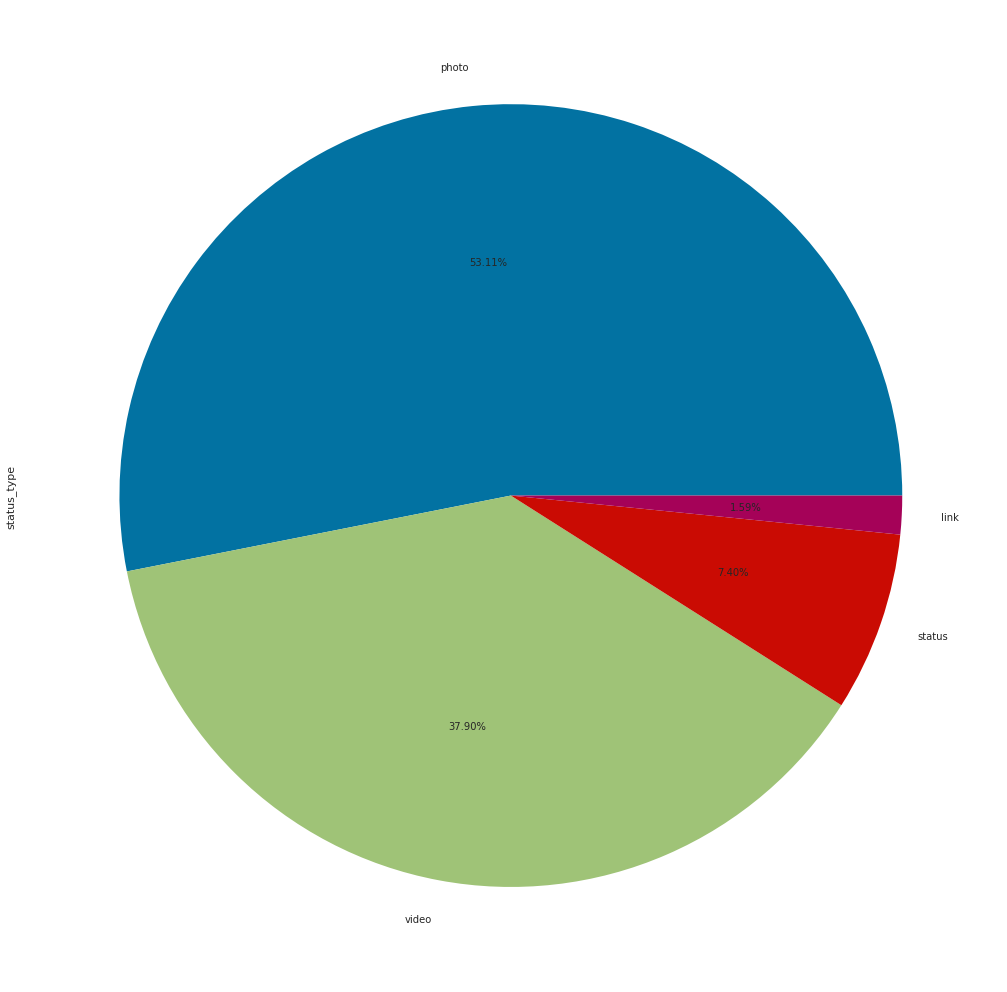

In [7]:
# % of observations

df['status_type'].value_counts().plot(kind = 'pie',autopct='%1.2f%%')
plt.show()

- photos and videos have the highest weightage followed by status and link respectively.

In [8]:
# for covariance
df.std()

num_reactions    513.125650
num_comments     588.804174
num_shares       128.279267
num_likes        552.038960
num_loves        572.046813
num_wows         653.607336
num_hahas        530.425486
num_sads         106.090370
num_angrys        21.224850
dtype: float64

In [9]:
df.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
num_reactions,1.000000,0.103821,-0.999997,0.257397,-0.127639,0.069981,-0.009695,0.009734,0.009975
num_comments,0.103821,1.000000,-0.103857,-0.078279,-0.098382,-0.018336,0.067648,-0.067764,-0.068162
num_shares,-0.999997,-0.103857,1.000000,-0.257376,0.127618,-0.069873,0.009614,-0.009653,-0.009892
num_likes,0.257397,-0.078279,-0.257376,1.000000,-0.037255,-0.316608,-0.035174,0.035155,0.035429
num_loves,-0.127639,-0.098382,0.127618,-0.037255,1.000000,0.147493,-0.012531,0.012494,0.013071
num_wows,0.069981,-0.018336,-0.069873,-0.316608,0.147493,1.000000,-0.128345,0.128311,0.128462
num_hahas,-0.009695,0.067648,0.009614,-0.035174,-0.012531,-0.128345,1.000000,-0.999996,-0.999911
num_sads,0.009734,-0.067764,-0.009653,0.035155,0.012494,0.128311,-0.999996,1.000000,0.999912
num_angrys,0.009975,-0.068162,-0.009892,0.035429,0.013071,0.128462,-0.999911,0.999912,1.000000


##### Create Visualization plots to find the relationship amongst the variables.

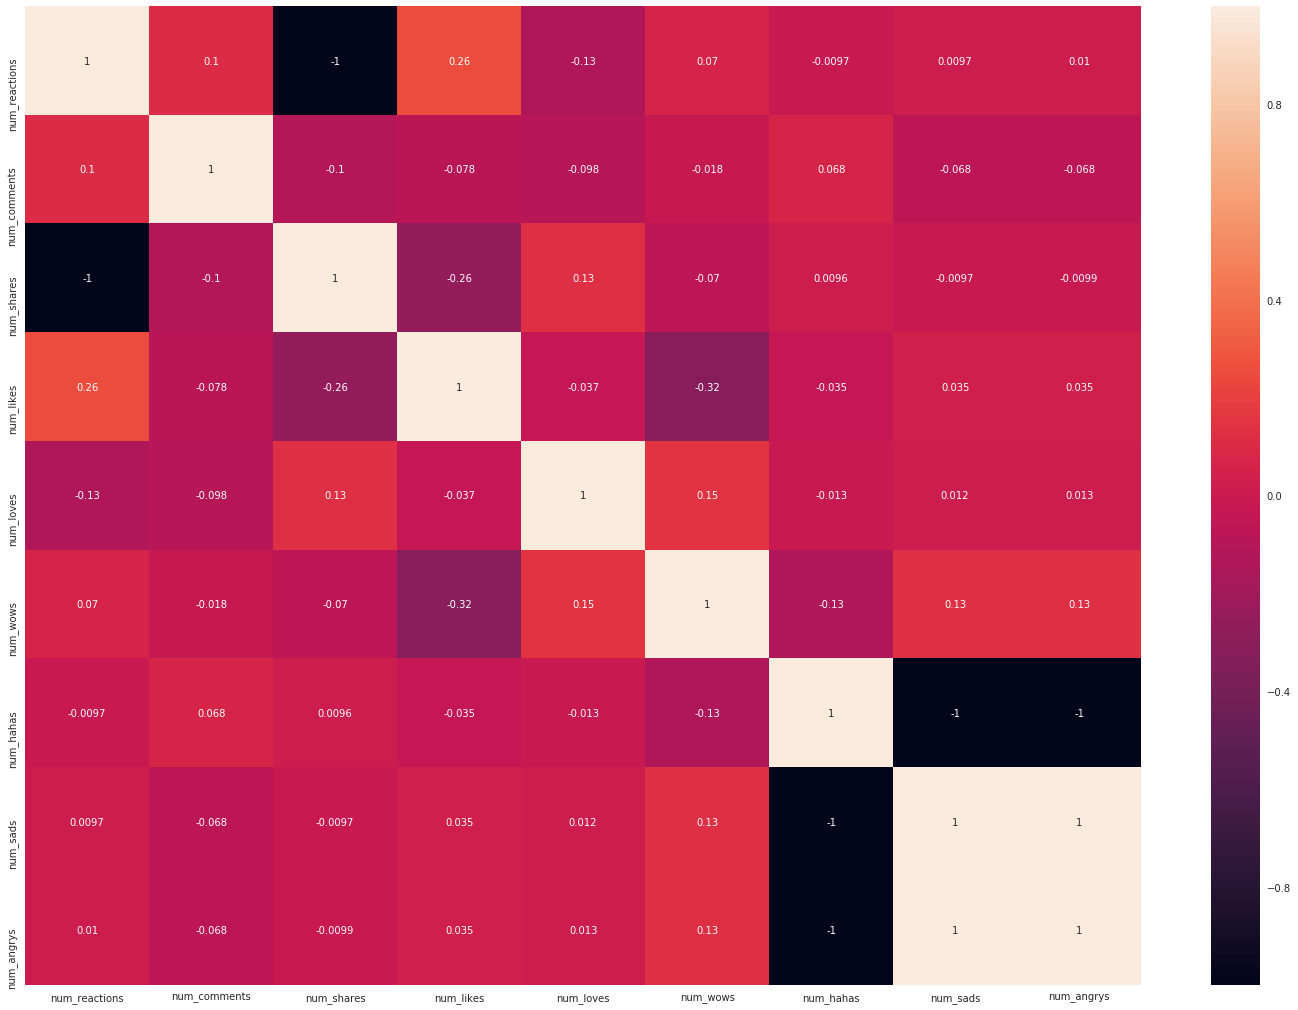

In [10]:
# for visualisation correlation

sns.heatmap(df.corr(),annot = True)

- The variables are showing moderate to low correlation amongst each other.

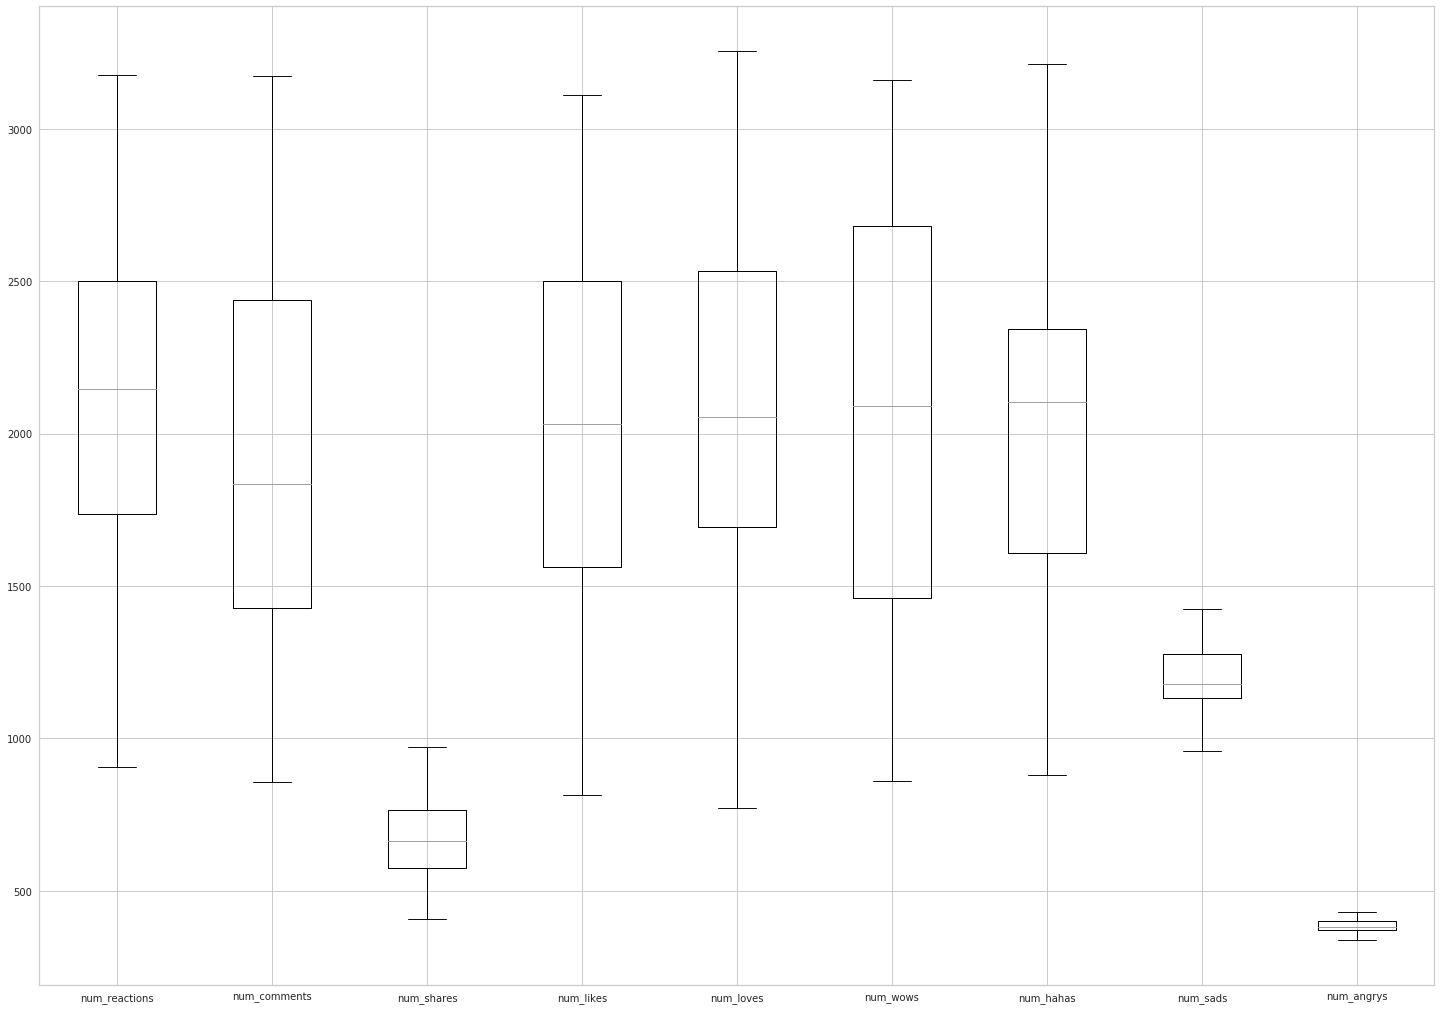

In [11]:
df.boxplot()

### PCA application

- PCA (Principal Component Analysis) is atechnique applicable when there is presence of multi - correlation between the variables.
- PCA helps in reducing the dimensions in the data.
- PCA can also be utilised for noise reduction.
- In the following data there is a correlation present among the independent variables in a moderate ratio, hence we can apply PCA technique for optimum model building.
- PCA components will give us the optimum datapoints with the most highest vaariance among datapoints which will eventually help us to build a good model.

###  Printing the top 5 eigen values and eigen vectors. Finding out how much pecentage of varaiance in the data is explained by this top 5 principle components cummulatively  

In [12]:
# for pca we'll have to prepare the data first
# begin with dropping the unnecessary columns and target variable

# dropping the variable with multiple unique data that does not contribute much to the model.
df_new = df.drop('status_id',axis = 1)

# dropping the target variable (for clustering)
df_new = df.drop('status_type',axis = 1)

In [13]:
# scaling the data - PCA requires data in scaled format

sc = StandardScaler()

df_scaled = pd.DataFrame(sc.fit_transform(df_new),columns = df_new.columns)

In [14]:
# performing PCA

pca = PCA(n_components = 5, random_state=1)
pca_model = pca.fit_transform(df_scaled)

print('Top 5 eigen values :',pca.explained_variance_,'\n')
print('Top 5 eigen vectors :',pca.components_,'\n')
print('Variation in the data :',pca.explained_variance_ratio_.sum())

Top 5 eigen values : [3.036102   2.16673202 1.30681508 1.09120987 0.99889645] 

Top 5 eigen vectors : [[ 0.0113677  -0.02089021  0.05797942  0.02083899 -0.02023875 -0.01826064
  -0.1084627   0.57245727 -0.57245895 -0.57246372]
 [ 0.0448521  -0.65855378 -0.11314807  0.6585521  -0.29683557  0.16844821
   0.02931363 -0.01238477  0.01236517  0.01225292]
 [-0.09818391 -0.16185514 -0.17418956  0.16182779  0.57221184 -0.23069788
  -0.72282582 -0.03877335  0.03880045  0.03871286]
 [ 0.15546564 -0.07786015  0.696664    0.07782501 -0.25709287 -0.61857251
  -0.15289028 -0.04596829  0.04590968  0.04523105]
 [ 0.96026641  0.0213681   0.01547701 -0.02147183  0.15652602  0.21130235
  -0.08604748 -0.00763538  0.00756835  0.00790019]] 

Variation in the data : 0.8592908483603033


- Taking into consideration 5 principal components, the variation in data is 85%.

In [15]:
pca_model.shape

(1256, 5)

In [16]:
# turning the pca_components obtained into a dataframe for model building

pca_data = pd.DataFrame(pca_model,columns = ['PC1','PC2','PC3','PC4','PC5'])
pca_data.head()

,PC1,PC2,PC3,PC4,PC5
0,2.358570,-1.382046,-0.591470,0.320805,0.214101
1,-0.299129,-1.548026,-1.696414,1.066450,-0.216783
2,0.027363,1.051578,-0.842005,-1.231737,0.155654
3,1.665072,0.638835,0.106627,-0.412453,-0.168055
4,-1.616644,0.601613,-0.832946,0.231124,-0.228353


###  Find the optimal number of clusters. 

In [17]:
# optimal cluster number can be found using multiple method

# method 1 : wcss (within cluster sum of squares)

wcss = []

for i in range(2,11):
    km = KMeans(n_clusters = i)
    km.fit(pca_data)
    wcss.append(km.inertia_)
    
wcss    

[8136.431032348489,
 6662.053998106029,
 5873.033998623177,
 5278.4493703665485,
 4732.644305746642,
 4331.033273667941,
 3991.5712926699193,
 3645.747134489793,
 3372.143590185764]

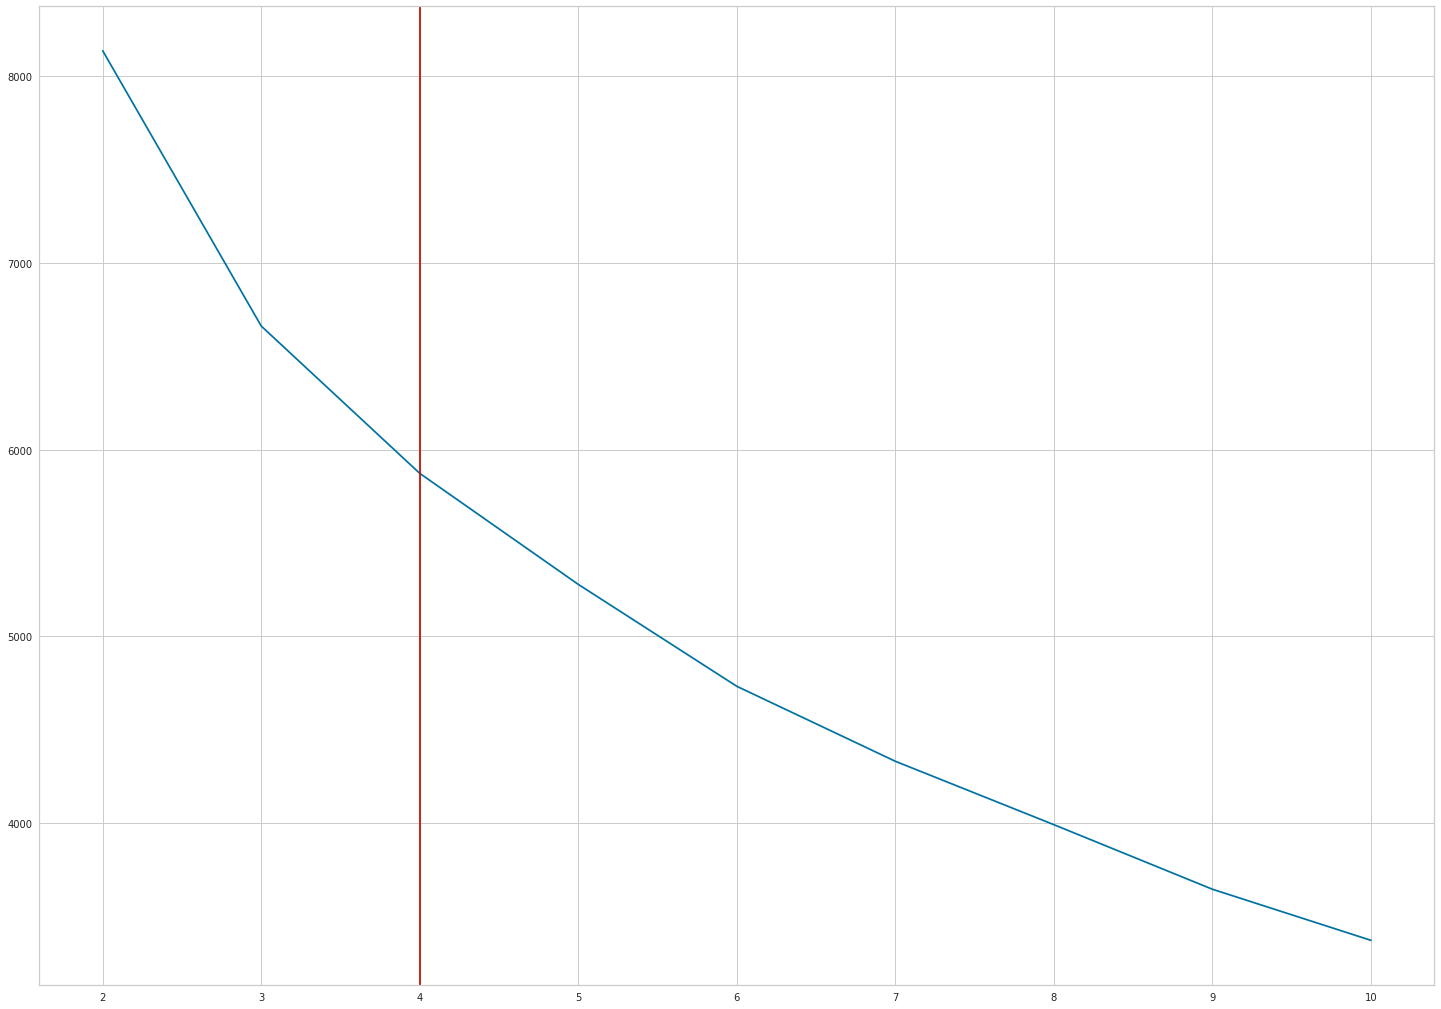

In [18]:
plt.plot(range(2,11),wcss)
plt.axvline(x = 4, color = 'r')
plt.show()

for wcss method the otimal cluster value seems to be 4.

In [21]:
# method 2 : silhouette score

silhouette = []

for i in range(2,11):
    km = KMeans(n_clusters = i)
    km.fit(pca_data)
    cluster_num = km.labels_
    score = silhouette_score(pca_data,cluster_num)
    silhouette.append(score)
print('for {} clusters the silhouette score is {}.'.format(i,score))

for 10 clusters the silhouette score is 0.2822651161318645.


In [22]:
silhouette

[0.23596014519603375,
 0.23933661916234492,
 0.2340889445563282,
 0.2451062296187256,
 0.2589576217257689,
 0.24980398381773977,
 0.26235359457826973,
 0.28316241432911615,
 0.2822651161318645]

using silhouette score the optimal cluster value seems to be 10, as the silhouette score for 10 is highest

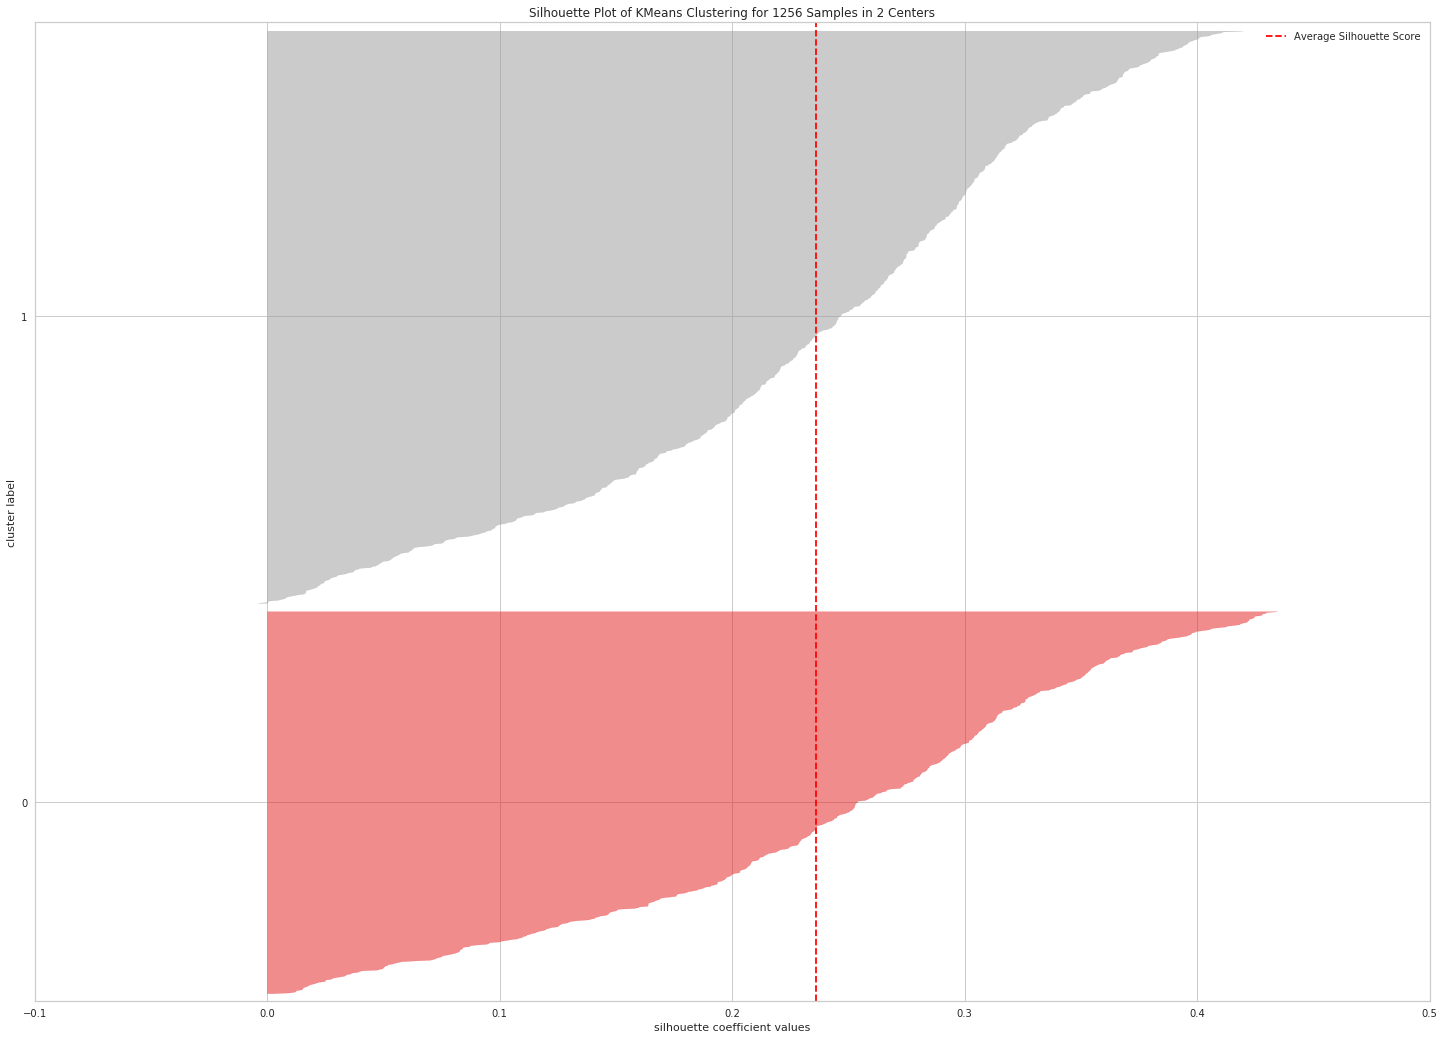

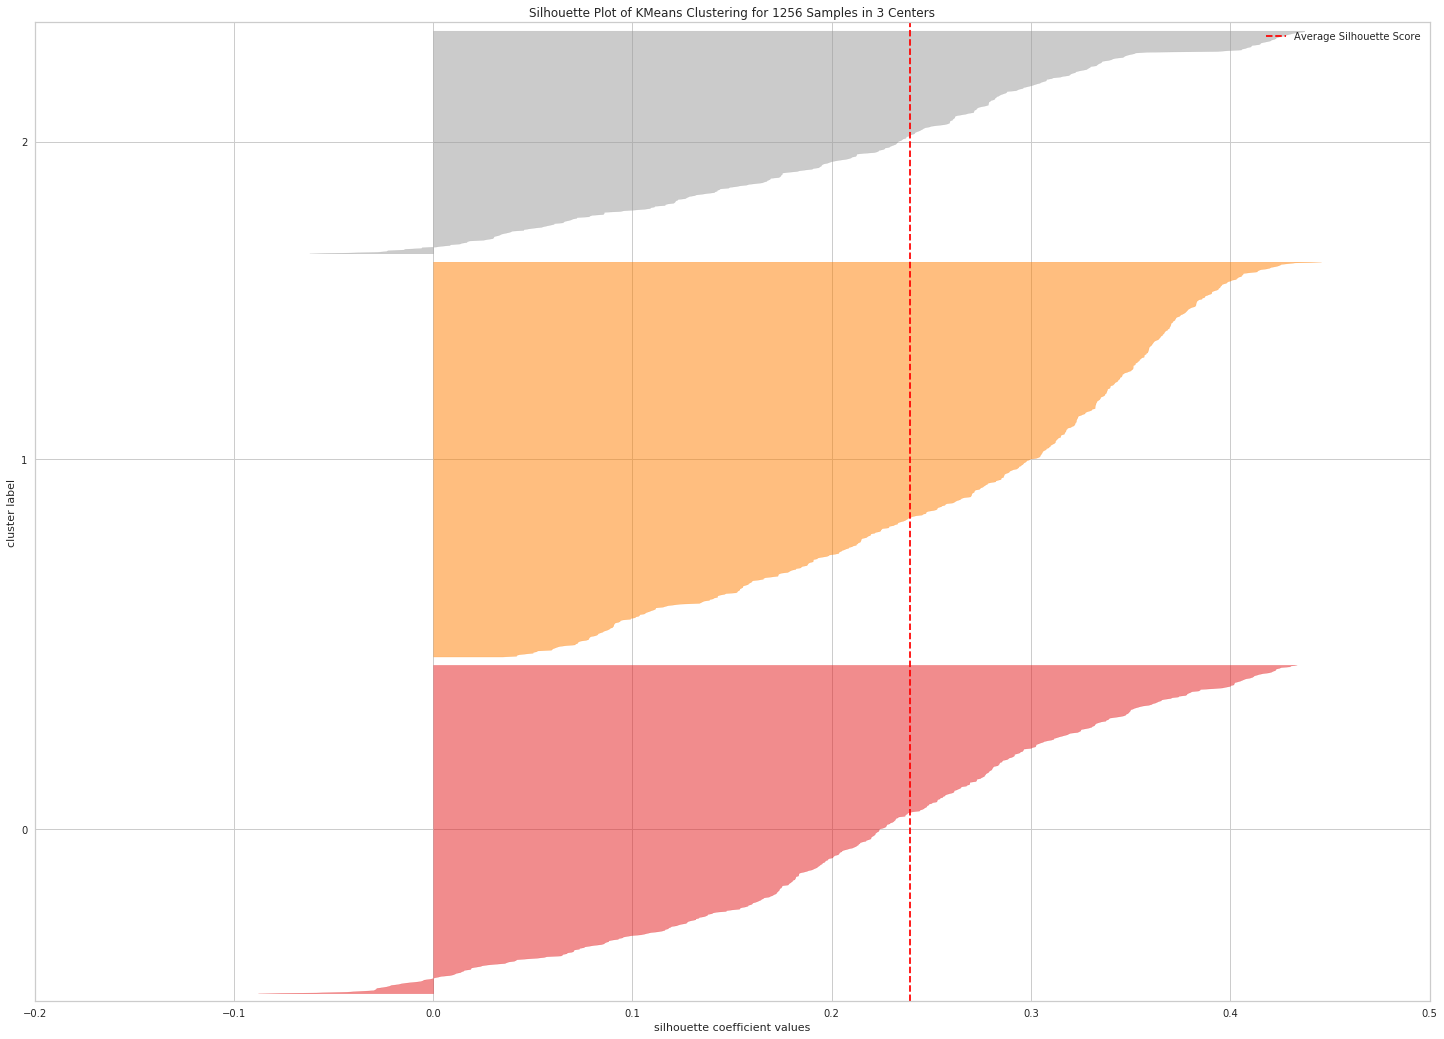

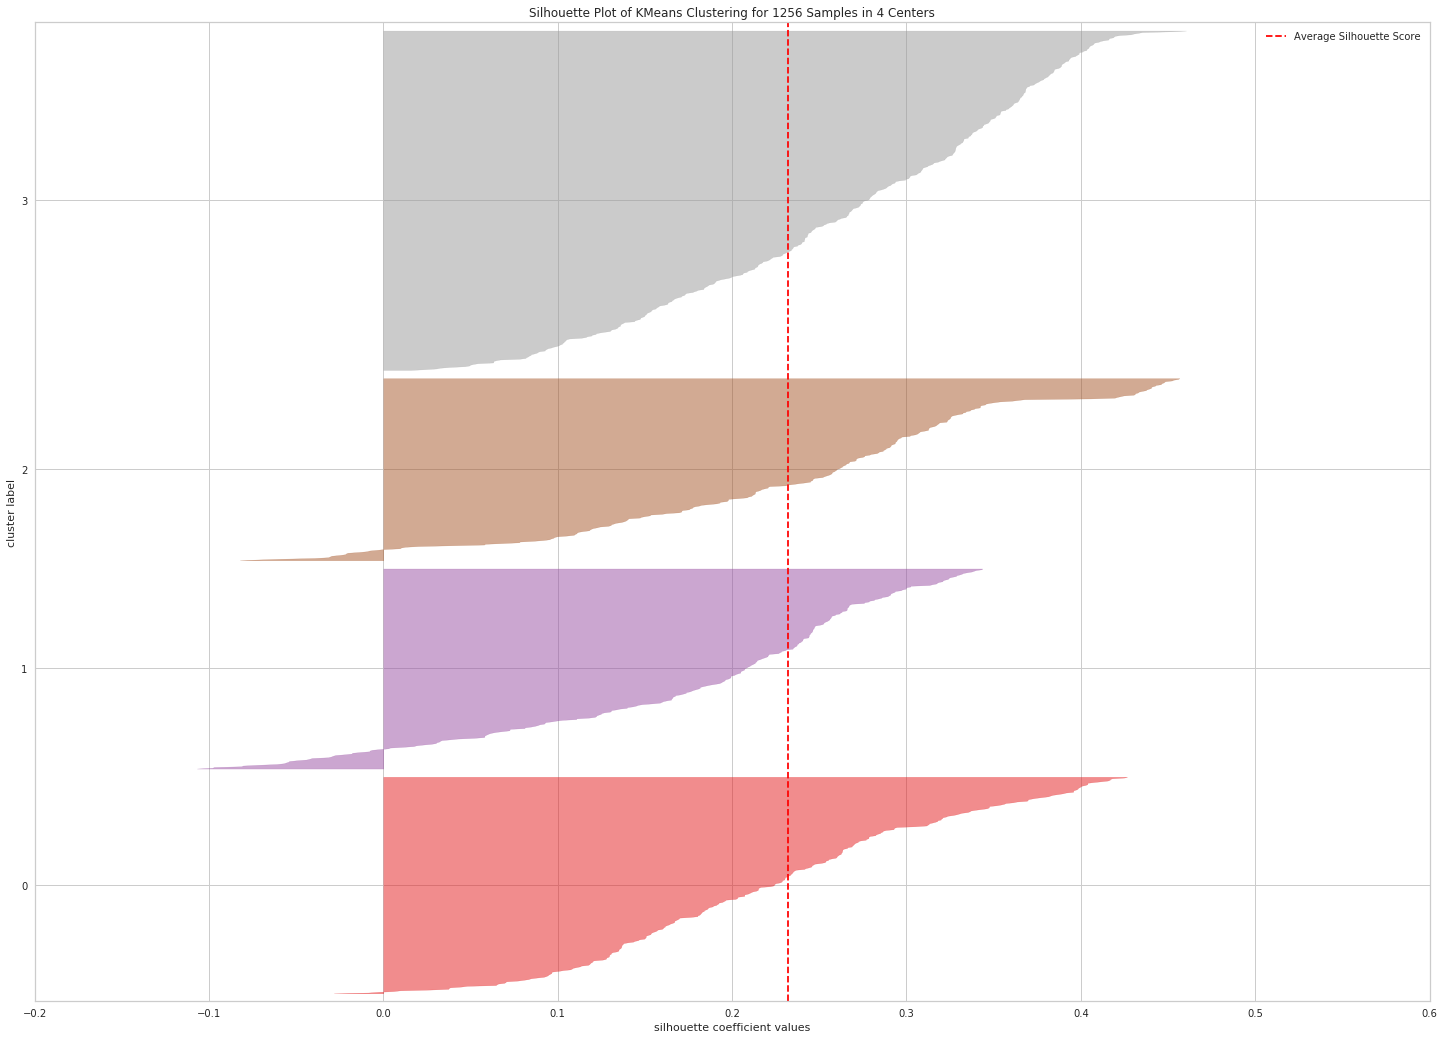

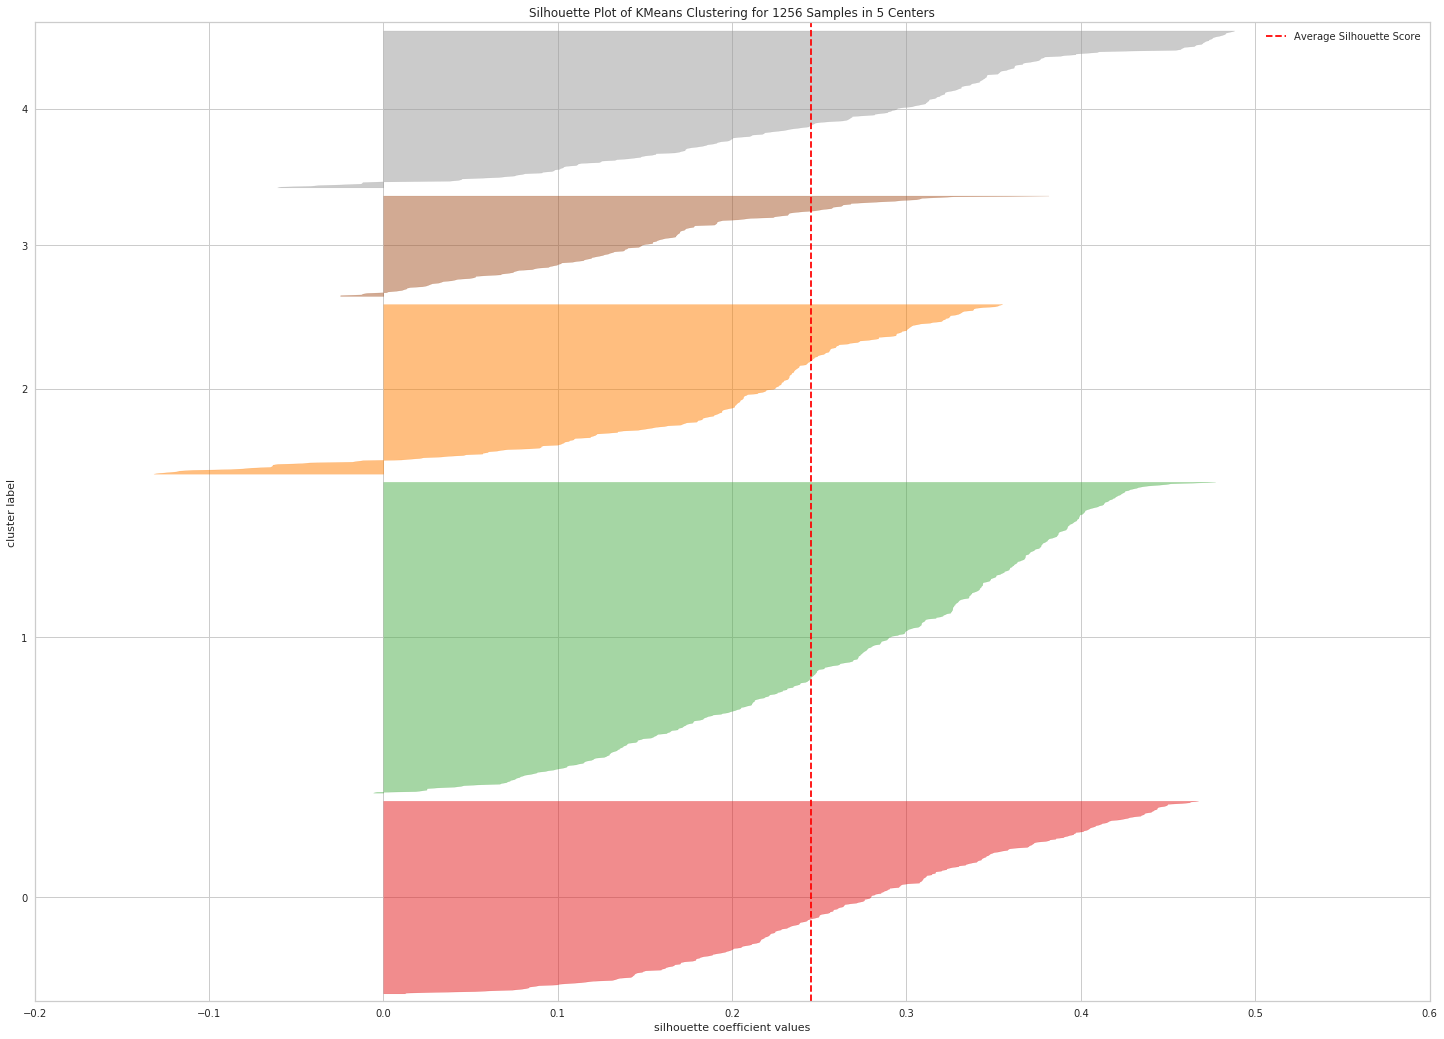

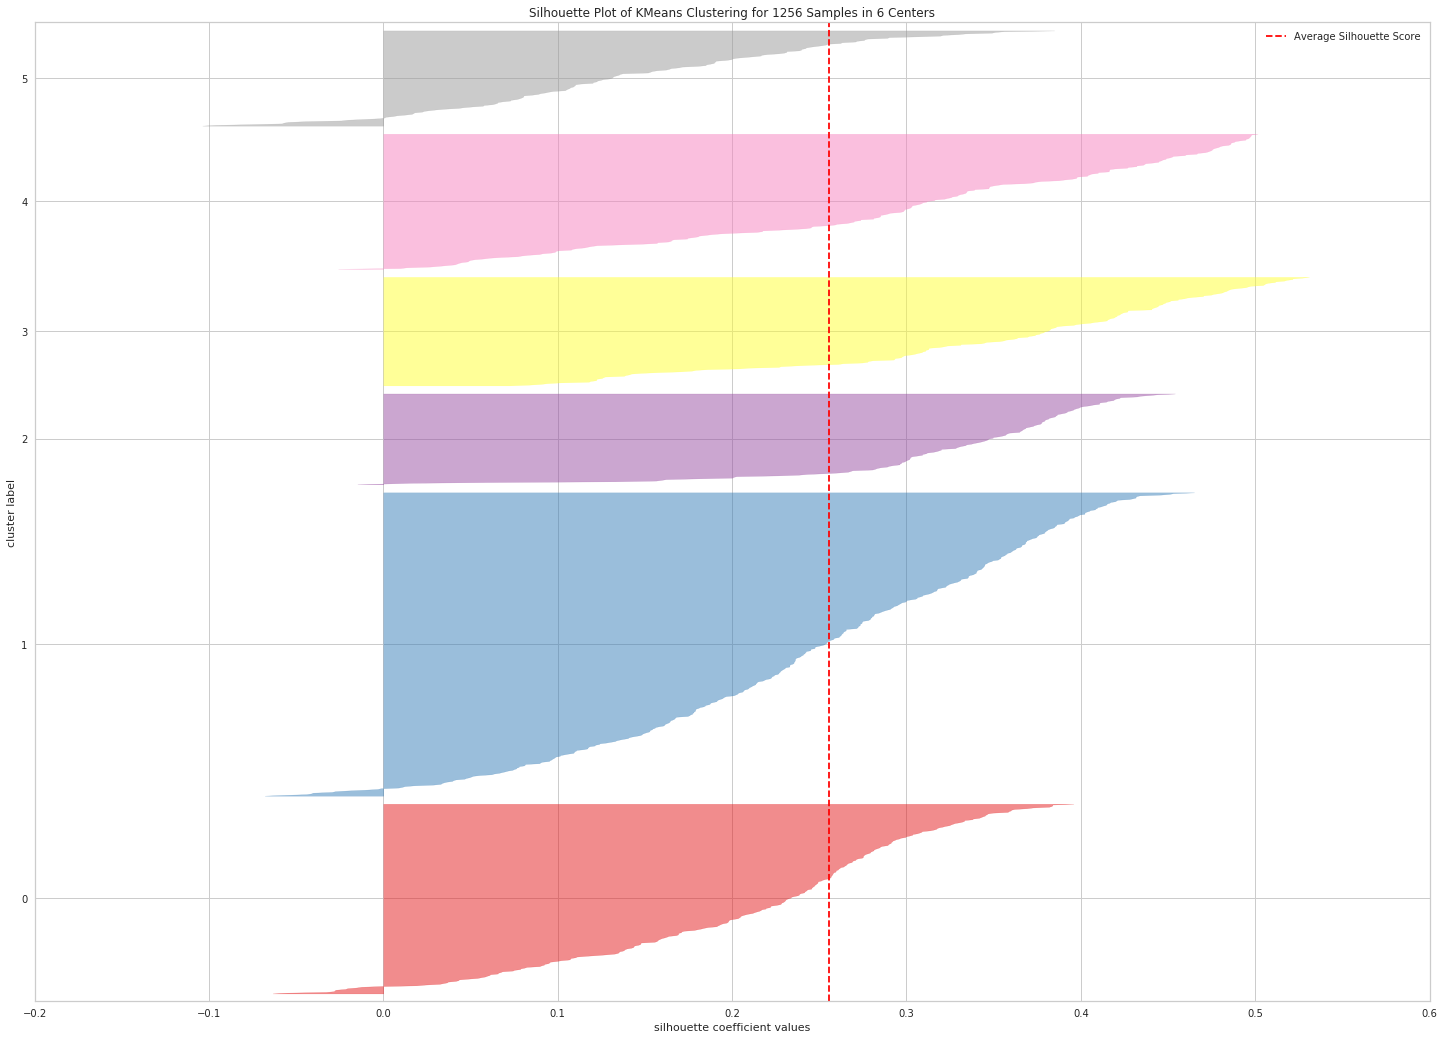

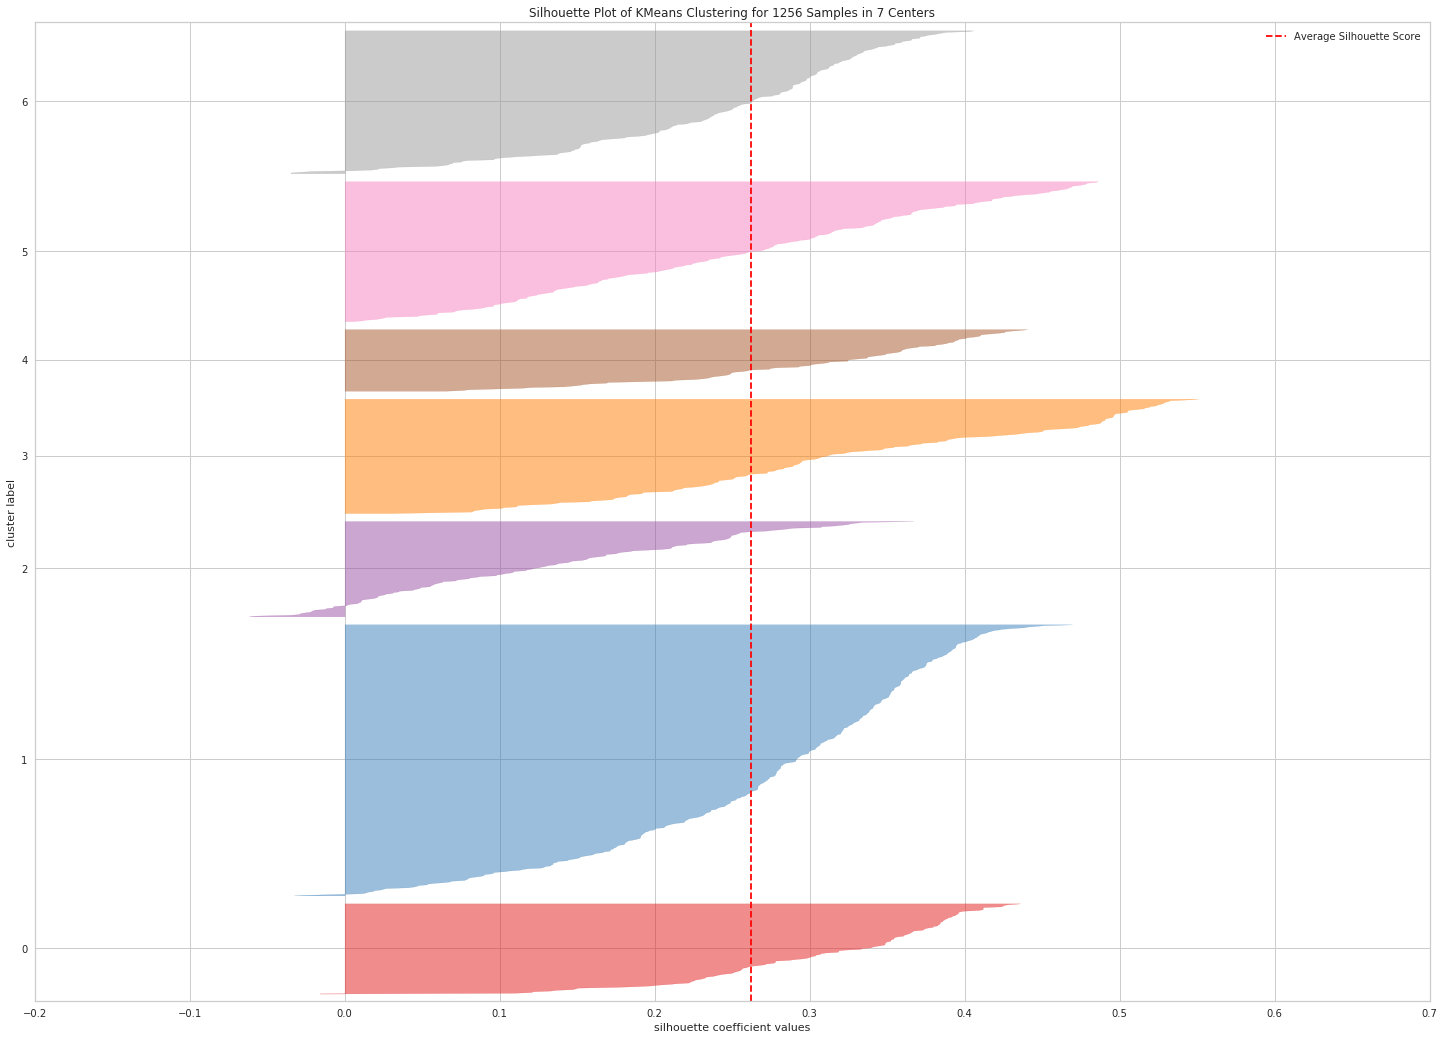

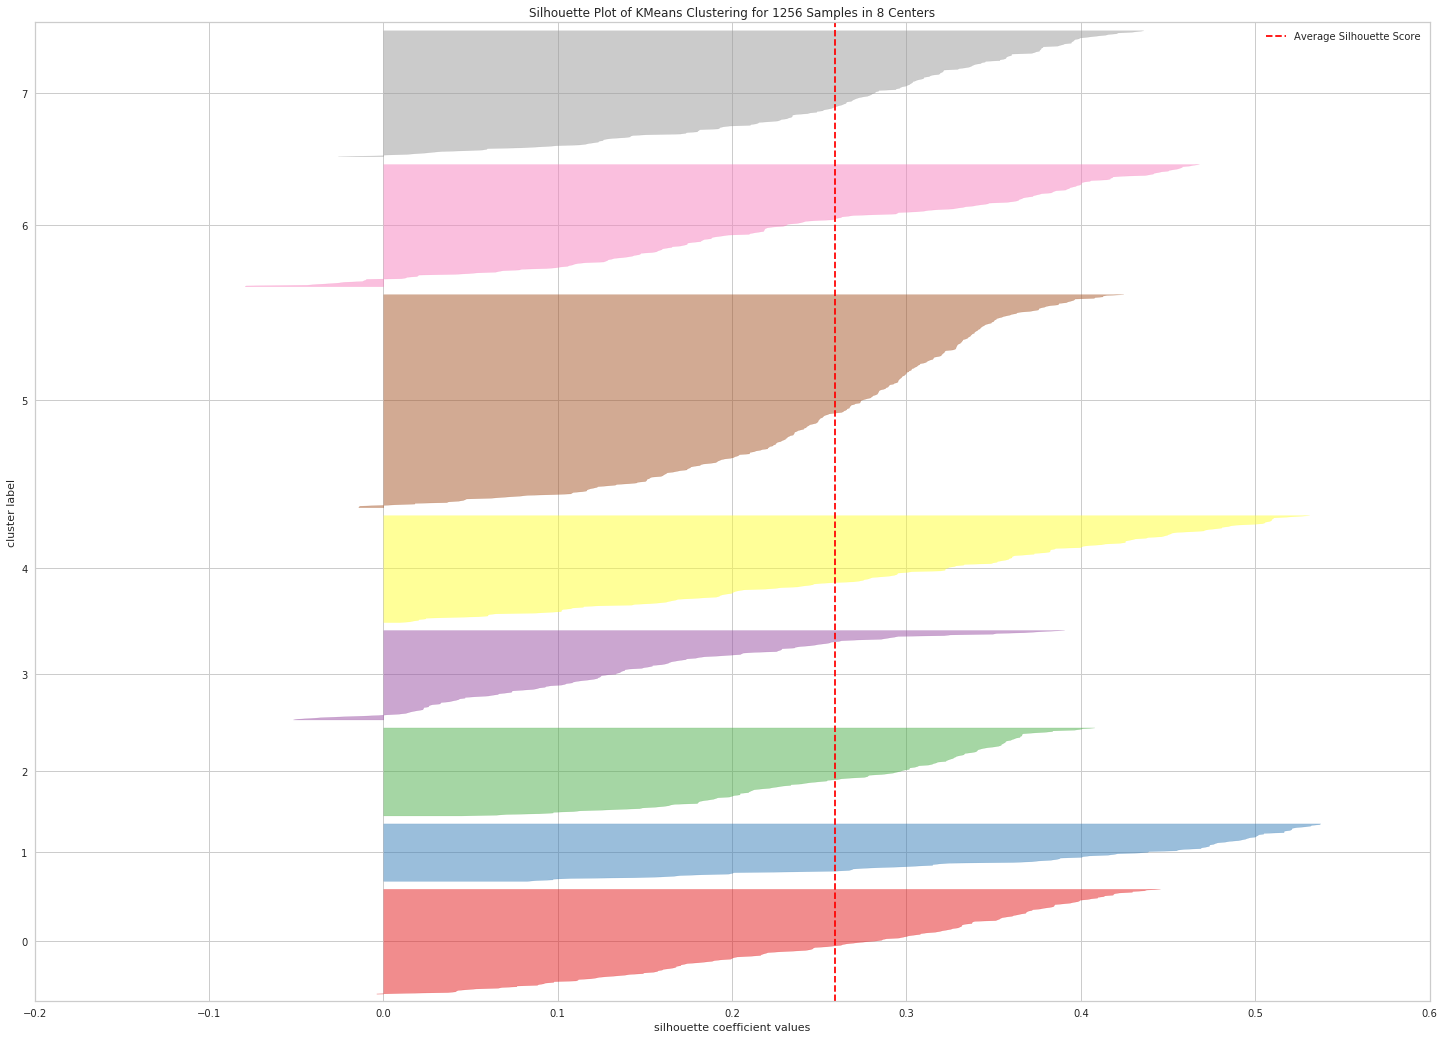

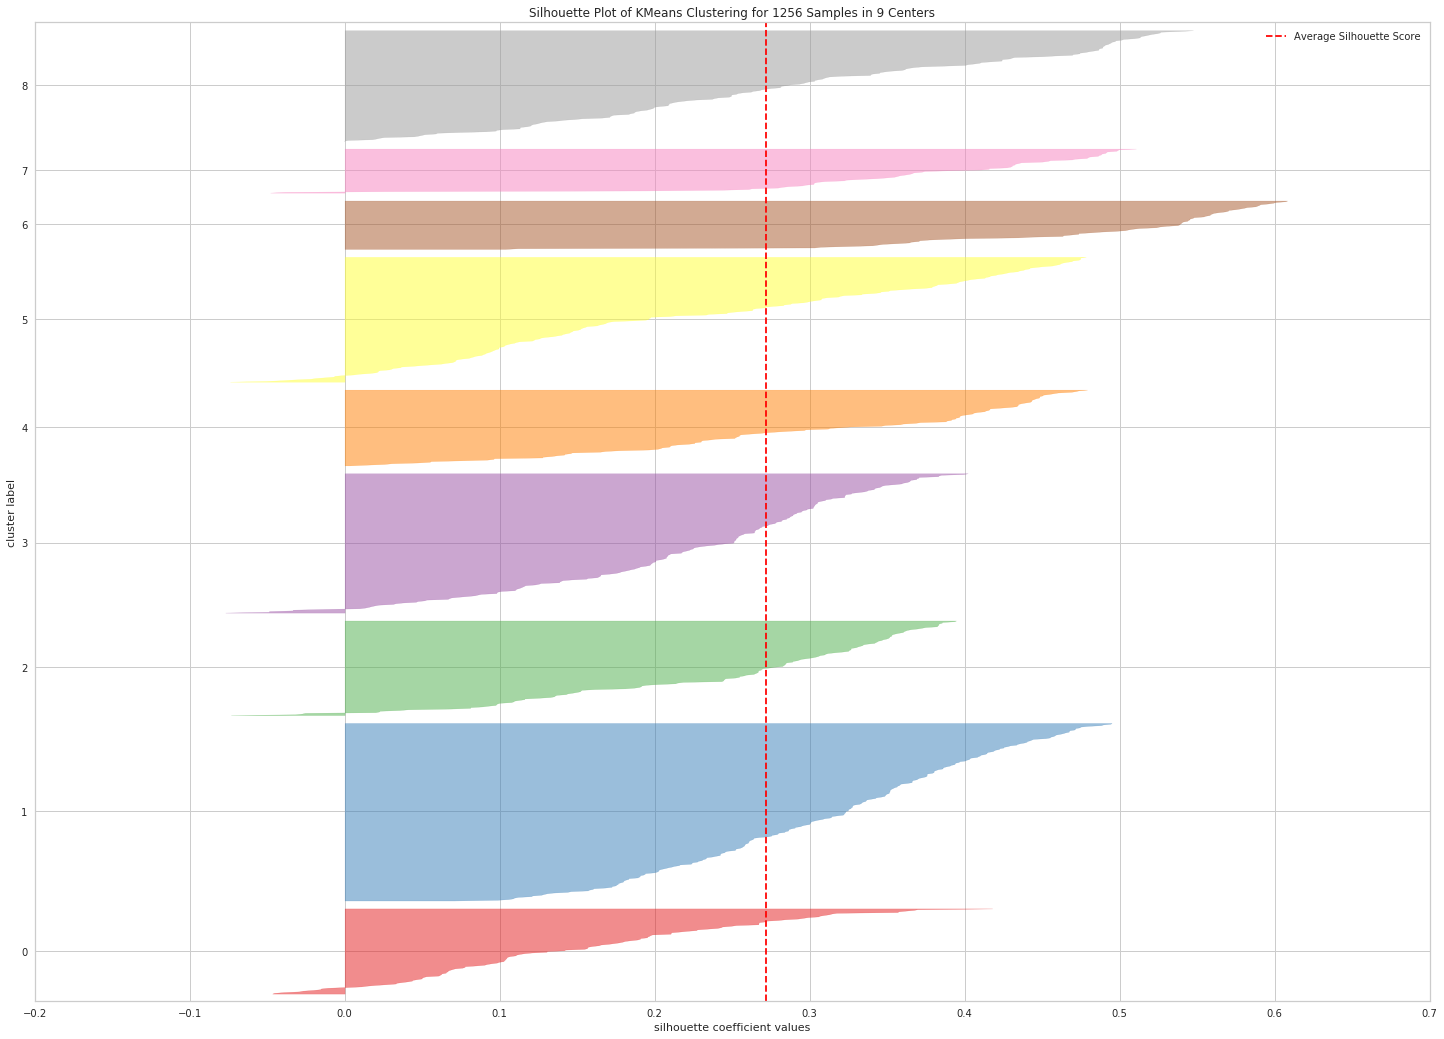

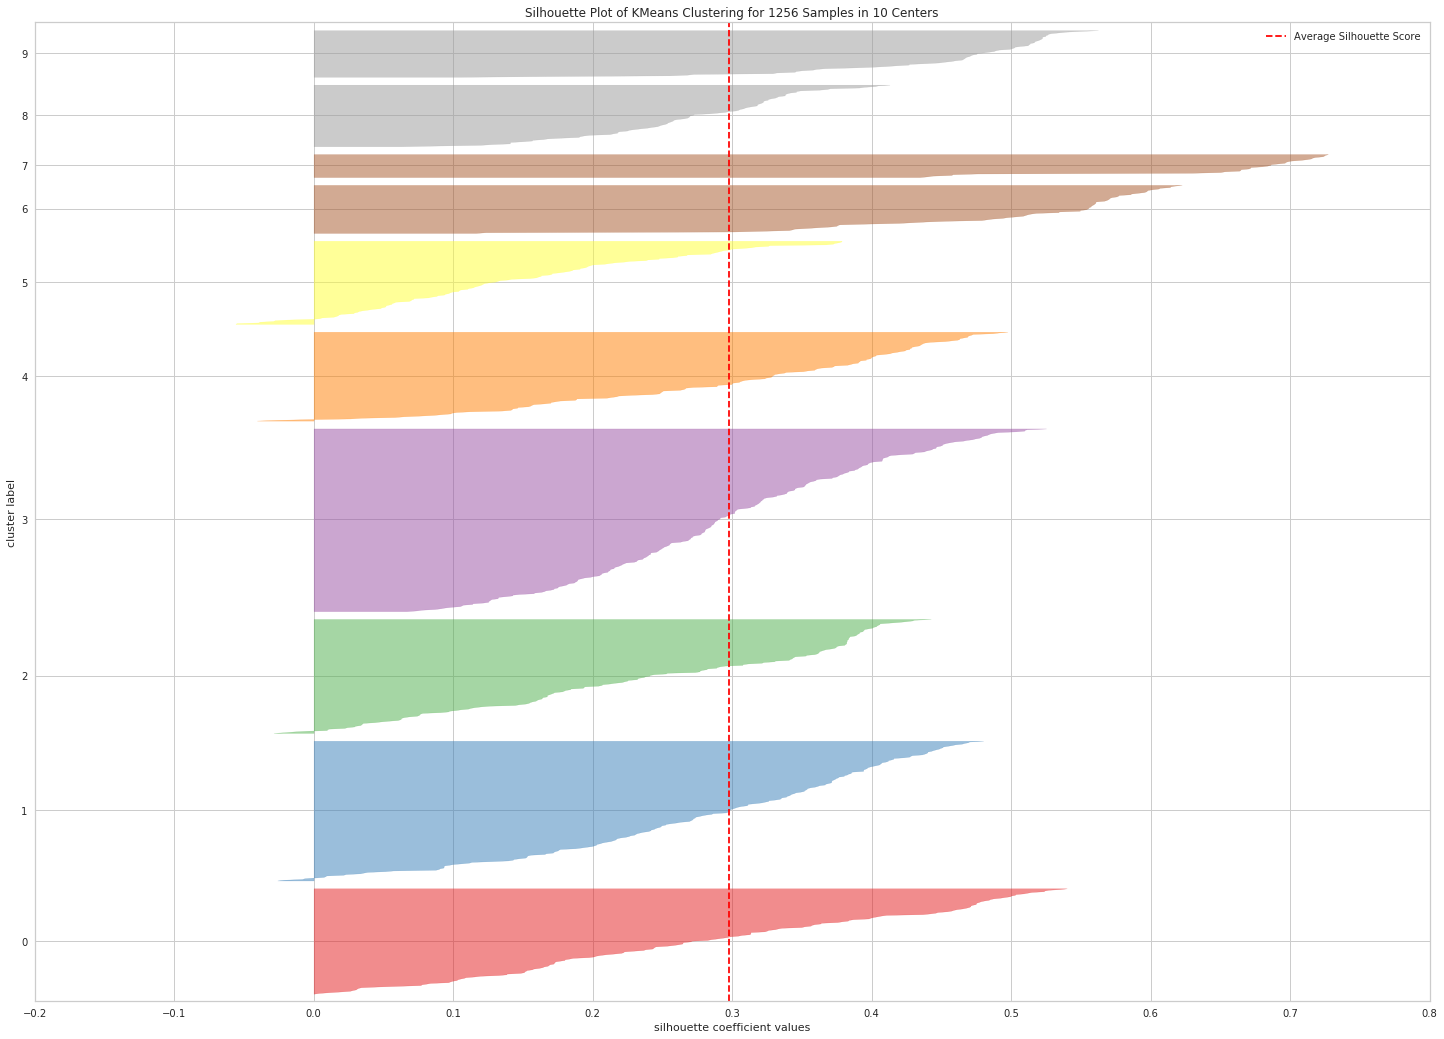

In [25]:
# method 3 : silhouette evisualizer

s = np.array(pca_data)

for i in range(2,11):
    silhouette_visualizer(KMeans(i),s)
plt.show()    

from silhouette visualiser method as well 4 seems to be the choice for number of clusters, to display a good distribution of data among the clusters.

Hence, '4' is chosen as the optimal cluster number.

### Applying Clustering with optimal value of k and find out if the data points have been clustered correctly using appropriate visualization 


In [28]:
km_model = KMeans(n_clusters = 4,random_state=1)

km_model.fit(pca_data)

df['clusters'] = km_model.labels_

df['clusters'].value_counts()

0    455
3    299
1    257
2    245
Name: clusters, dtype: int64

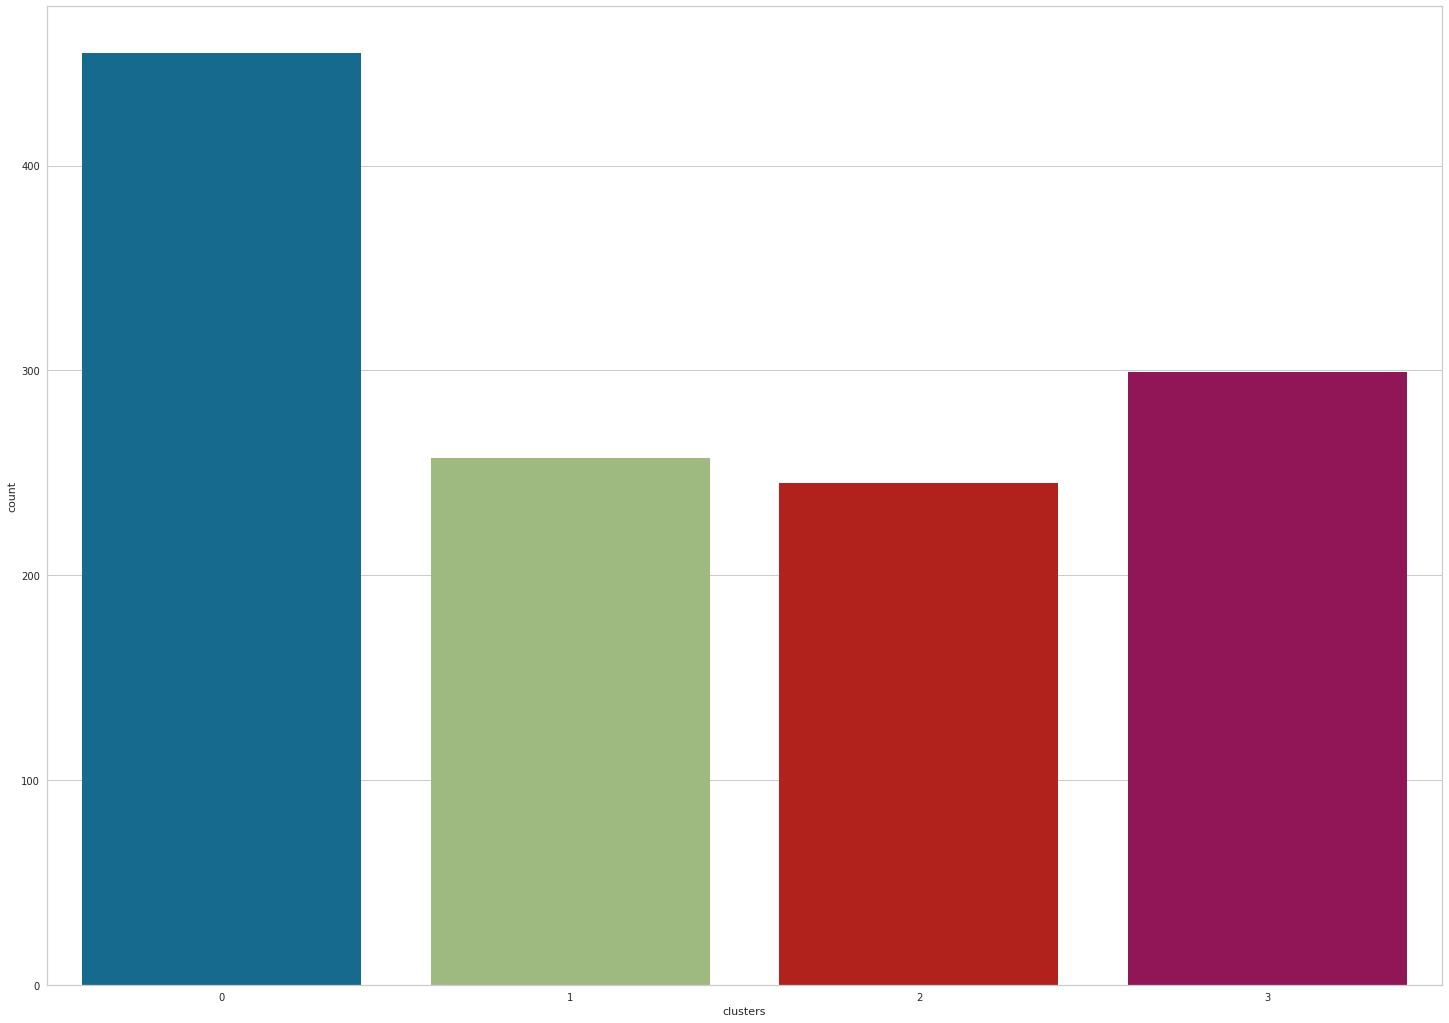

In [29]:
sns.countplot(df['clusters'])

### 	Evaluating the quality of clusters formed using appropriate metrics to support the model built.

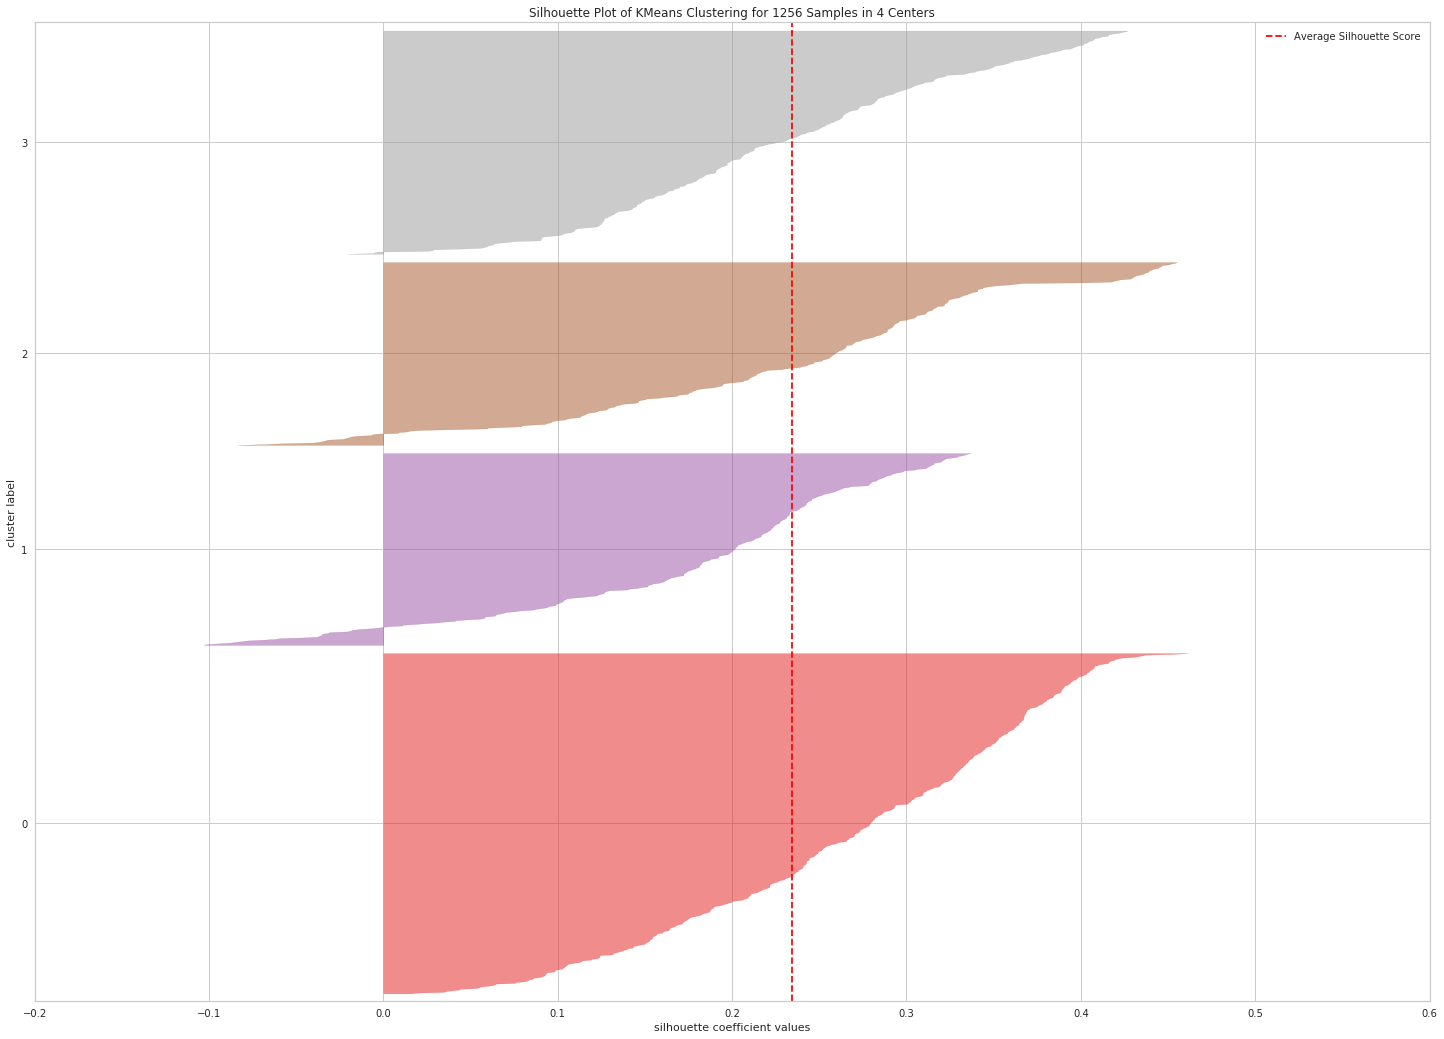

In [42]:
s = np.array(pca_data)

silhouette_visualizer(KMeans(4,random_state = 1),s)
plt.show()

- The variation of cluster 1,2,3 is comparatively equal except for cluster 0.
- The cluster variations are above the average silhouette score line proving that they are good clusters.
- The tails that are going the left side display the outliers in data which are negligible in ths case, as the number of likes,dislikes,reactions can vary from person to person.
- Overall it can be interpreted that creating 4 clusters can be the qualitative way to properly categorise the data and come up with better business solutions.

### Write down a business interpretation/explanation of the model – Use the cluster centroids to make the business inferences for each cluster groups 

In [45]:
km_model.cluster_centers_

array([[ 1.04374471, -1.09823046, -0.24554343,  0.27416429, -0.0885453 ],
       [-1.98645781,  0.48843143,  0.8508157 ,  0.76636886, -0.1475253 ],
       [ 1.67159483,  1.76934377,  0.28819343, -0.03188527,  0.10506929],
       [-1.25303792, -0.19610937, -0.58897983, -1.0437443 ,  0.17437538]])

In [30]:
df.groupby('clusters').mean()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
clusters,,,,,,,,,
0,2471.043956,2191.024176,582.228571,2042.340659,1917.784615,2015.340659,2357.402198,1128.520879,371.701099
1,1853.412451,2012.428016,736.638132,2094.062257,1707.754864,1745.805447,1395.626459,1320.894942,410.178988
2,1464.510204,1812.342857,833.848980,1794.506122,2213.106122,1813.616327,2526.265306,1094.730612,364.930612
3,2249.294314,1603.287625,637.712375,2130.632107,2566.842809,2579.869565,1698.347826,1260.341137,398.093645


In [31]:
# for cluster number 1

df[df['clusters']==0].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,clusters
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.0
mean,2471.043956,2191.024176,582.228571,2042.340659,1917.784615,2015.340659,2357.402198,1128.520879,371.701099,0.0
std,277.550928,570.548895,69.400742,534.996867,453.698839,600.713347,287.993963,57.598557,11.521417,0.0
min,1903.000000,871.000000,406.000000,1036.000000,972.000000,924.000000,1823.000000,976.000000,341.000000,0.0
25%,2270.500000,1946.000000,532.000000,1636.500000,1625.000000,1428.500000,2169.000000,1119.000000,370.000000,0.0
50%,2459.000000,2331.000000,585.000000,1979.000000,1862.000000,2209.000000,2274.000000,1145.000000,375.000000,0.0
75%,2672.500000,2578.500000,632.500000,2563.500000,2182.500000,2546.000000,2406.000000,1166.000000,379.000000,0.0
max,3176.000000,3173.000000,724.000000,3017.000000,3026.000000,3049.000000,3122.000000,1235.000000,393.000000,0.0


In [32]:
df[df['clusters']==0].describe(include = 'object')

,status_id,status_type
count,455,455
unique,455,4
top,246675545449582_1254116288038831,photo
freq,1,244


#### cluster 1:

- For this cluster the features num_likes, num_comments, num_wows showcases higher significance(based on the variance), these seem to be posts that are well-liked and widely appreciated by the users of the platform.
- A study on these posts can help in understanding what can help to get the most interactions ina positive manner and reach a larger audience.

In [33]:
# for cluster 2
df[df['clusters']==1].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,clusters
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.0
mean,1853.412451,2012.428016,736.638132,2094.062257,1707.754864,1745.805447,1395.626459,1320.894942,410.178988,1.0
std,424.670968,650.919305,106.176985,500.978811,555.924461,510.486878,283.183811,56.614657,11.334710,0.0
min,1043.000000,1027.000000,516.000000,1076.000000,773.000000,872.000000,881.000000,1189.000000,384.000000,1.0
25%,1469.000000,1460.000000,663.000000,1547.000000,1147.000000,1319.000000,1172.000000,1278.000000,402.000000,1.0
50%,1917.000000,1716.000000,721.000000,2260.000000,1751.000000,1717.000000,1372.000000,1326.000000,411.000000,1.0
75%,2146.000000,2647.000000,833.000000,2476.000000,2119.000000,2075.000000,1608.000000,1366.000000,419.000000,1.0
max,2736.000000,3148.000000,939.000000,2895.000000,2959.000000,2844.000000,2057.000000,1424.000000,431.000000,1.0


In [34]:
df[df['clusters']==1].describe(include = 'object')

,status_id,status_type
count,257,257
unique,257,4
top,1050855161656896_1385747901500952,photo
freq,1,136


#### cluster 2:

- The posts in this cluster seem to have a higher positive reactions as the num_comments, num_likes, num_loves, num_wows have a higher significance.
- These posts can be highlighted as the one that users seem to react positively to the most.

In [35]:
# for cluster 3
df[df['clusters']==2].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,clusters
count,245.000000,245.000000,245.00000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.0
mean,1464.510204,1812.342857,833.84898,1794.506122,2213.106122,1813.616327,2526.265306,1094.730612,364.930612,2.0
std,286.002187,537.383968,71.52179,612.756802,519.673279,697.772703,352.107238,70.421629,14.063938,0.0
min,906.000000,858.000000,635.00000,813.000000,1181.000000,861.000000,1895.000000,957.000000,337.000000,2.0
25%,1246.000000,1365.000000,771.00000,1274.000000,1891.000000,1219.000000,2183.000000,1035.000000,353.000000,2.0
50%,1400.000000,1650.000000,850.00000,1648.000000,2108.000000,1579.000000,2547.000000,1091.000000,364.000000,2.0
75%,1715.000000,2355.000000,889.00000,2360.000000,2626.000000,2650.000000,2826.000000,1163.000000,379.000000,2.0
max,2260.000000,2758.000000,973.00000,2976.000000,3200.000000,3119.000000,3214.000000,1221.000000,390.000000,2.0


In [36]:
df[df['clusters']==2].describe(include = 'object')

,status_id,status_type
count,245,245
unique,245,4
top,1050855161656896_1414318881977187,photo
freq,1,125


#### cluster 3 :

- This particular cluster has comparatively higher std value for num_hahas than other clusters.
- these posts can be used in understanding the humour code of the following reactors.

In [37]:
# for cluster 4

df[df['clusters']==3].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,clusters
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.0
mean,2249.294314,1603.287625,637.712375,2130.632107,2566.842809,2579.869565,1698.347826,1260.341137,398.093645,3.0
std,390.696582,368.510439,97.661538,514.659252,407.505028,466.552204,254.441261,50.874342,10.178833,0.0
min,1426.000000,1004.000000,434.000000,1101.000000,1517.000000,1478.000000,1128.000000,1147.000000,375.000000,3.0
25%,1922.500000,1323.000000,559.000000,1793.500000,2307.000000,2186.500000,1529.500000,1222.000000,390.000000,3.0
50%,2274.000000,1524.000000,631.000000,2070.000000,2657.000000,2814.000000,1667.000000,1267.000000,399.000000,3.0
75%,2564.500000,1760.000000,719.500000,2444.500000,2887.500000,2946.500000,1891.500000,1294.000000,405.000000,3.0
max,3064.000000,2538.000000,843.000000,3111.000000,3256.000000,3160.000000,2266.000000,1374.000000,421.000000,3.0


In [38]:
df[df['clusters']==3].describe(include = 'object')

,status_id,status_type
count,299,299
unique,299,4
top,246675545449582_901562963294167,photo
freq,1,162


#### cluster 4 :

- This cluster seems to have a comparatively low interaction rate except for number of. likes having a high variance.
- These posts can be taken into consideration to understand what can cause a lack of interactions.

#### Business interpretation :

- The following clusters can be used by the company to understand the content demographics of their users.

- The users of these clusters can be recommended on joining different social clubs on the platform (if any) to keep them interested and direct them to their favourable content.

- By studying individual clusters we can understand the preferences of users and recommended related posts on the platform.

- The feeds of the users can be personalised by recommending posts depending on their previous likes, reactions, this can help the user to have a good experience on the platform.

- A study of the content of these posts in each of the cluster can also help in understanding what kind of content brings out the maximum interactions,reactions and what content does not do the same. This will help the users to understand and amplify their post for maximum reach in the platform.